###### Praveen Thinagarajan - praveen.thinagarajan@gmail.com - 512-888-2034

# Podcast Analysis

## Importing necessary packages for analysis

In [1]:
# For data exploration
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
import numpy as np

# For modeling and model validation
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

# For data exporting
import pickle

C:\Users\Praveen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Step-1: Exploratory Data Analysis to get a feel of the dataset

## Checking contents of dataset
### Observations:
* Dataset contains both numeric and categoric variables 
* Dataset contains variables for denoting member ID and target variable (Podcast users among mobile apps members) 
* ID variable: anon_person_id
* Target variable: target
* Categoric variables: state, marital_status, gender, income
* Numeric variables: number_of_news_subs, age
* Boolean variables: presence_of_child_ind, streaming_media_subs, streaming_entertainment_subs

In [2]:
ds_practical_data = pd.read_csv('ds_practical.txt', sep="|")
ds_practical_data.head(5)

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
2,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
3,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
4,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0


## Checking dataset counts and basic statistics for numeric variables
### Observations:
* Dataset contains 1 Million rows 
* Age has missing values 
* anon_person_id's max value is less than total data size indicating possible presence of duplicates

In [3]:
ds_practical_data.describe()

,anon_person_id,target,presence_of_child_ind,streaming_entertainment_subs,number_of_news_subs,age
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,980298.000000
mean,499500.750000,0.149743,0.144680,0.173690,0.205013,46.851937
std,288674.846352,0.356820,0.351778,0.378843,0.771099,15.018724
min,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,249500.750000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,499500.500000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,749500.250000,0.000000,0.000000,0.000000,0.000000,51.000000
max,999500.000000,1.000000,1.000000,1.000000,8.000000,99.000000


## Removing duplicates in data

In [4]:
# dropping ALL duplicate values
ds_practical_data=ds_practical_data.drop_duplicates()

In [5]:
# Confirming if duplicates were removed
ds_practical_data.describe()

,anon_person_id,target,presence_of_child_ind,streaming_entertainment_subs,number_of_news_subs,age
count,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,979899.000000
mean,499750.500000,0.149741,0.144689,0.173696,0.205026,46.851708
std,288530.941366,0.356817,0.351788,0.378848,0.771110,15.018765
min,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,249875.750000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,499750.500000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,749625.250000,0.000000,0.000000,0.000000,0.000000,51.000000
max,999500.000000,1.000000,1.000000,1.000000,8.000000,99.000000


In [6]:
ds_practical_data.head(5)

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
2,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
3,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
4,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0


## Checking % of missing values in each Column
### Observations:
* 'State' variable has about 1% of missing values
* 'Age' variable has about 2% of missing values

In [7]:
ds_practical_data.isnull().sum()/len(ds_practical_data)*100

anon_person_id                  0.000000
target                          0.000000
state                           1.002901
presence_of_child_ind           0.000000
streaming_media_subs            0.000000
streaming_entertainment_subs    0.000000
marital_status                  0.000000
gender                          0.000000
income                          0.000000
number_of_news_subs             0.000000
age                             1.961081
dtype: float64

## Checking % of possible values in each column
### Observations:

* 'State' has very less variability in the data; About 98% of the variable points to one value type: 'CA'
* 'Gender' variable has two value types for denoting 'Female'; Needs to be cleaned before usage for model
* 'Income' variable has multiple value types; Can be converted into numeric for better usage in model

In [115]:
print(ds_practical_data['target'].value_counts(ascending=True, dropna=False))

1    149666
0    849834
Name: target, dtype: int64


In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
for col in ds_practical_data.columns:
    if(col not in ['anon_person_id']):
        print("****************************************************")
        print("---------Variable - "+col+"-------------")
        print(ds_practical_data[col].value_counts(ascending=True, normalize=True, dropna=False)*100)

****************************************************
---------Variable - target-------------
1    14.974087
0    85.025913
Name: target, dtype: float64
****************************************************
---------Variable - state-------------
DC      0.205903
NaN     1.002901
GA      1.083642
CA     97.707554
Name: state, dtype: float64
****************************************************
---------Variable - presence_of_child_ind-------------
1    14.468934
0    85.531066
Name: presence_of_child_ind, dtype: float64
****************************************************
---------Variable - streaming_media_subs-------------
Y    17.369585
N    82.630415
Name: streaming_media_subs, dtype: float64
****************************************************
---------Variable - streaming_entertainment_subs-------------
1    17.369585
0    82.630415
Name: streaming_entertainment_subs, dtype: float64
****************************************************
---------Variable - marital_status-------------
S

# Step-2: Cleaning up data for model creation
## Handling missing values 

In [9]:
ds_practical_data.head(2)

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0


### Strategies: 

* Dropping 'state' variable due to very little variablilty in the data
* Using a median value to impute for 'Age'

In [10]:
ds_practical_data_imputed = ds_practical_data.drop('state', axis=1)
ds_practical_data_imputed['age'].fillna(ds_practical_data['age'].median(), inplace=True)

## Confirming that all missing values have been handled

In [11]:
ds_practical_data_imputed.isnull().sum()/len(ds_practical_data)*100

anon_person_id                  0.0
target                          0.0
presence_of_child_ind           0.0
streaming_media_subs            0.0
streaming_entertainment_subs    0.0
marital_status                  0.0
gender                          0.0
income                          0.0
number_of_news_subs             0.0
age                             0.0
dtype: float64

# Step-3: Feature Transformations

### Replacing imprecise values with appropriate values

#### Variable & Assumption:
* gender - Replacing 'feMalee' with 'Female'; Assuming this was a typo for value 'Female'; Can confirm the same with stakeholders/data engineering teams

In [12]:
ds_practical_data_feature_transformed = ds_practical_data_imputed
ds_practical_data_feature_transformed["gender"].replace({"feMalee": "Female"},inplace=True)

In [13]:
ds_practical_data_feature_transformed.shape

(999500, 10)

In [14]:
print(ds_practical_data_feature_transformed["gender"].value_counts(ascending=True, normalize=True, dropna=False)*100)

Female    42.538469
Male      57.461531
Name: gender, dtype: float64


### Converting categorical to numeric variables using one-hot encoding
#### Variable & Strategy:
* ** marital status:** Creating a feature each for 'Married' and 'Single'; Not creating a feature for 'Unknown' because it wouldn't be insightful as a variable

In [15]:
feature_to_be_modified_1 = 'marital_status'
one_hot_feature_1 = pd.get_dummies(ds_practical_data_feature_transformed[feature_to_be_modified_1], prefix=feature_to_be_modified_1)
print(one_hot_feature_1.head())
for col in one_hot_feature_1:
    ds_practical_data_feature_transformed[col]=one_hot_feature_1[col]

# Printing one-hot encoded values
print(ds_practical_data_feature_transformed.shape)
ds_practical_data_feature_transformed = ds_practical_data_feature_transformed.drop(feature_to_be_modified_1, axis=1)
ds_practical_data_feature_transformed = ds_practical_data_feature_transformed.drop(['marital_status_U'], axis=1)

#printing transformed data
ds_practical_data_feature_transformed.head(5)

   marital_status_M  marital_status_S  marital_status_U
0                 1                 0                 0
1                 0                 0                 1
2                 0                 1                 0
3                 0                 0                 1
4                 0                 0                 1
(999500, 13)


,anon_person_id,target,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,gender,income,number_of_news_subs,age,marital_status_M,marital_status_S
0,1,0,0,N,0,Female,$175k-199k,0,43.0,1,0
1,2,0,0,N,0,Male,$225k-249k,0,90.0,0,0
2,3,1,0,Y,1,Female,$150k-174k,0,46.0,0,1
3,4,0,1,N,0,Female,$125k-149k,0,25.0,0,0
4,5,0,0,N,0,Female,$175k-199k,0,62.0,0,0


#### Variable & Strategy:
* **streaming_media_subs:** Convert boolean string values to numeric 
* **gender:** Converting categorical variable to numeric; 1 indicate male and 0 would indicate female

In [16]:
ds_practical_data_feature_transformed['streaming_media_subs'].replace(('Y', 'N'), (1, 0), inplace=True)
ds_practical_data_feature_transformed['gender'].replace(('Male', 'Female'), (1, 0), inplace=True)
ds_practical_data_feature_transformed.head(5)

,anon_person_id,target,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,gender,income,number_of_news_subs,age,marital_status_M,marital_status_S
0,1,0,0,0,0,0,$175k-199k,0,43.0,1,0
1,2,0,0,0,0,1,$225k-249k,0,90.0,0,0
2,3,1,0,1,1,0,$150k-174k,0,46.0,0,1
3,4,0,1,0,0,0,$125k-149k,0,25.0,0,0
4,5,0,0,0,0,0,$175k-199k,0,62.0,0,0


#### Strategy for feature:
* **income:** Converting categorical variable to numeric; Use mean value of income range to assign a value
* Replacing each value with the average of minimum and maximum figures within each range
* For example, converting "$25k-49k" to "$37k" ie. (25+49)/2; Retaining only the number 37 in field

In [17]:
# Check % of value counts
print(ds_practical_data['income'].value_counts(ascending=True, normalize=True, dropna=False)*100)

<$25k          0.007904
$25k-49k       0.083942
$50k-74k       0.450825
$75k-99k       1.501051
U              1.695348
$100k-124k     3.872136
$250k+         8.006903
$125k-149k     8.226713
$150k-174k    14.560380
$225k-249k    17.387194
$175k-199k    21.145973
$200k-224k    23.061631
Name: income, dtype: float64


In [18]:
# Replacing each value with the average of minimum and maximum figures within each range
ds_practical_data_feature_transformed['income'].replace(('<$25k'), (12.5), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$25k-49k'), (37), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$50k-74k'), (62), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$75k-99k'), (87), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$100k-124k'), (112), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$250k+'), (250), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$125k-149k'), (137), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$150k-174k'), (162), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$225k-249k'), (237), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$175k-199k'), (187), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('$200k-224k'), (212), inplace=True)
ds_practical_data_feature_transformed['income'].replace(('U'), (212), inplace=True)

In [19]:
# Checking value counts for modified variable
print(ds_practical_data_feature_transformed['income'].value_counts(ascending=True, normalize=True, dropna=False)*100)

12.5      0.007904
37.0      0.083942
62.0      0.450825
87.0      1.501051
112.0     3.872136
250.0     8.006903
137.0     8.226713
162.0    14.560380
237.0    17.387194
187.0    21.145973
212.0    24.756978
Name: income, dtype: float64


In [20]:
# View latest data
ds_practical_data_feature_transformed.head(5)

,anon_person_id,target,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,gender,income,number_of_news_subs,age,marital_status_M,marital_status_S
0,1,0,0,0,0,0,187.0,0,43.0,1,0
1,2,0,0,0,0,1,237.0,0,90.0,0,0
2,3,1,0,1,1,0,162.0,0,46.0,0,1
3,4,0,1,0,0,0,137.0,0,25.0,0,0
4,5,0,0,0,0,0,187.0,0,62.0,0,0


In [21]:
ds_practical_data_feature_transformed.describe()

,anon_person_id,target,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,gender,income,number_of_news_subs,age,marital_status_M,marital_status_S
count,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000,999500.000000
mean,499750.500000,0.149741,0.144689,0.173696,0.173696,0.574615,194.065349,0.205026,46.815395,0.290589,0.049487
std,288530.941366,0.356817,0.351788,0.378848,0.378848,0.494401,40.169709,0.771110,14.872987,0.454035,0.216882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,19.000000,0.000000,0.000000
25%,249875.750000,0.000000,0.000000,0.000000,0.000000,0.000000,162.000000,0.000000,40.000000,0.000000,0.000000
50%,499750.500000,0.000000,0.000000,0.000000,0.000000,1.000000,212.000000,0.000000,45.000000,0.000000,0.000000
75%,749625.250000,0.000000,0.000000,0.000000,0.000000,1.000000,237.000000,0.000000,51.000000,1.000000,0.000000
max,999500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.000000,8.000000,99.000000,1.000000,1.000000


## Step-4: Find patterns in data to get a sense of important predictors

### Observations:
Based on mean values, **typical podcasts users** seem to:
* Have children 
* Subscribe to streaming services
* Listen to streaming entertainment
* Be female users
* Have lesser income than non-podcast users
* Subscribe to news services, non-digital and digital
* Be younger than non-podcast users
* Have been identified as 'Married' or 'Single'

In [22]:
ds_practical_data_feature_transformed.groupby('target').mean()

,anon_person_id,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,gender,income,number_of_news_subs,age,marital_status_M,marital_status_S
target,,,,,,,,,,
0,499933.023589,0.069982,0.100327,0.100327,0.640276,201.911272,0.000000,47.130148,0.254927,0.022455
1,498714.093922,0.568893,0.590301,0.590301,0.201783,149.514603,1.369202,45.028163,0.493085,0.202979


## Charts to confirm relationships between variables and target

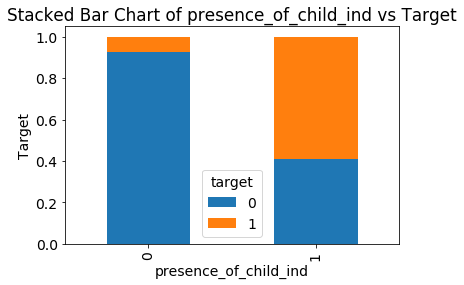

In [23]:
var_name='presence_of_child_ind'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

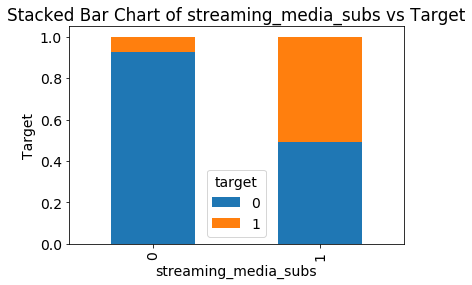

In [24]:
var_name='streaming_media_subs'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

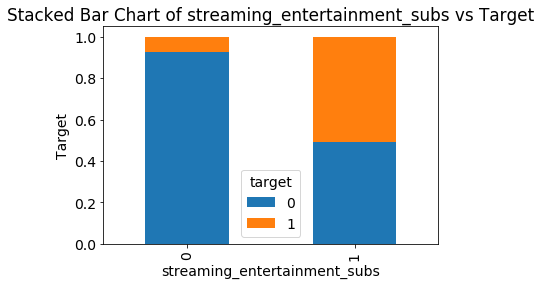

In [25]:
var_name='streaming_entertainment_subs'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

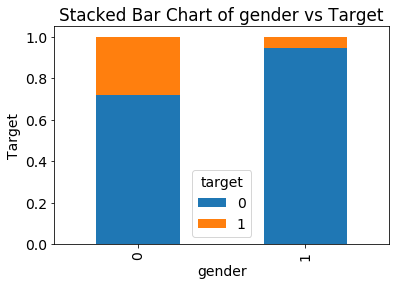

In [26]:
var_name='gender'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

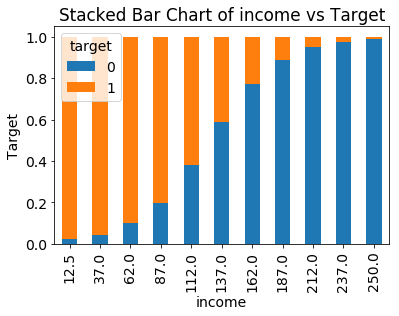

In [27]:
var_name='income'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

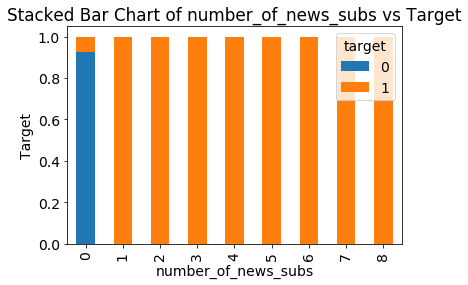

In [28]:
var_name='number_of_news_subs'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

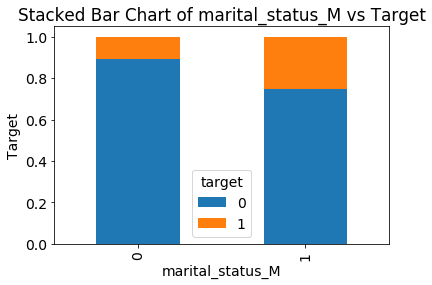

In [29]:
var_name='marital_status_M'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

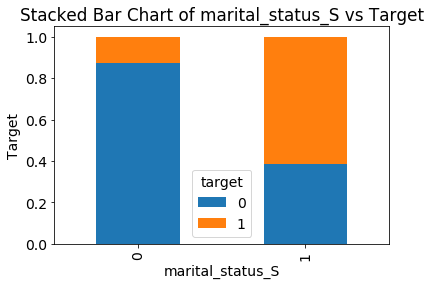

In [30]:
var_name='marital_status_S'
table=pd.crosstab(ds_practical_data_feature_transformed[var_name],ds_practical_data_feature_transformed.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of '+ var_name + ' vs Target')
plt.xlabel(var_name)
plt.ylabel('Target')
plt.savefig(var_name + ' vs Target')
plt.show()

## Step-5: Feature Selection
## Taking a look at Correlation between variables
### Focus: 
* To understand good predictors for target 
* To check presence of multi-collinearity

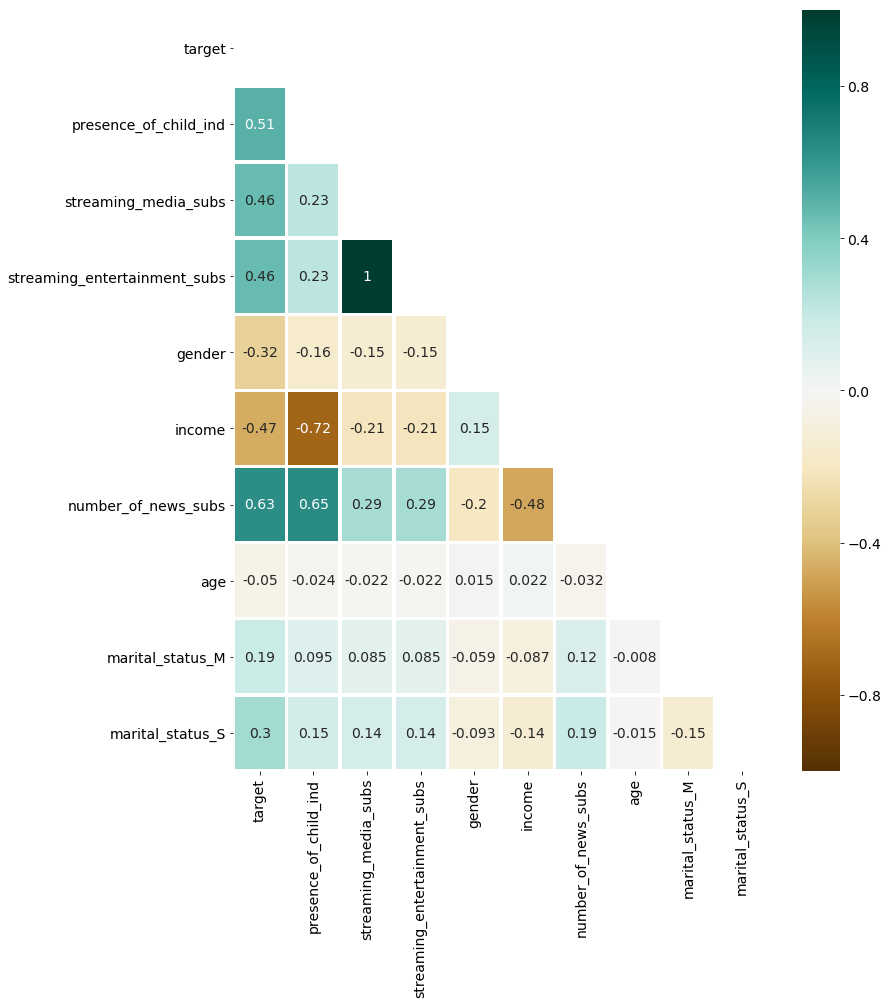

In [32]:
corr_df=ds_practical_data_feature_transformed[ds_practical_data_feature_transformed.columns.drop('anon_person_id')].corr(method='pearson')
# Creating a mask to display only the lower triangle of the matrix
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='BrBG',vmax=1.0,vmin=-1.0,mask=mask, linewidths=2.5,annot=True)
# Reorienting the labels to better represent the chart
plt.rcParams['figure.figsize'] = [12, 14]
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Taking a look at VIF values to exclude variables due to multi-collinearity
### * In the case of scenarios where we certainly need to use a set of multi-collinear variables, we could opt to use Regularization techniques like Lasso/Ridge



In [33]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(ds_practical_data_feature_transformed.values, i) for i in range(ds_practical_data_feature_transformed.shape[1])]
vif_info['Column'] = ds_practical_data_feature_transformed.columns
vif_info.sort_values('VIF', ascending=False)

C:\Users\Praveen\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Column
3,inf,streaming_media_subs
4,inf,streaming_entertainment_subs
6,11.743265,income
8,9.433822,age
0,3.840806,anon_person_id
1,2.643031,target
5,2.546369,gender
7,2.346462,number_of_news_subs
2,2.235836,presence_of_child_ind
9,1.523903,marital_status_M


### Strategy: VIF values greater than 5 are considered to be highly multi-collinear

In [34]:
# Removing ID, Target variables (We don't need to exclude them based on VIF)
# Removing 'streaming_entertainment_subs' from features due to a high VIF
ds_practical_data_feature_vif = ds_practical_data_feature_transformed.drop(['anon_person_id','target','streaming_entertainment_subs'], axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(ds_practical_data_feature_vif.values, i) for i in range(ds_practical_data_feature_vif.shape[1])]
vif_info['Column'] = ds_practical_data_feature_vif.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,10.034605,income
5,9.349532,age
2,2.447180,gender
0,2.142772,presence_of_child_ind
4,1.962150,number_of_news_subs
6,1.467855,marital_status_M
1,1.340877,streaming_media_subs
7,1.135293,marital_status_S


In [35]:
# Removing 'Income' variable due to very high VIF
ds_practical_data_feature_vif = ds_practical_data_feature_vif.drop(['income'], axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(ds_practical_data_feature_vif.values, i) for i in range(ds_practical_data_feature_vif.shape[1])]
vif_info['Column'] = ds_practical_data_feature_vif.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,2.826478,age
2,2.169232,gender
0,2.006278,presence_of_child_ind
3,1.962007,number_of_news_subs
5,1.431793,marital_status_M
1,1.330079,streaming_media_subs
6,1.130153,marital_status_S


## Checking distributions if numeric features look normal

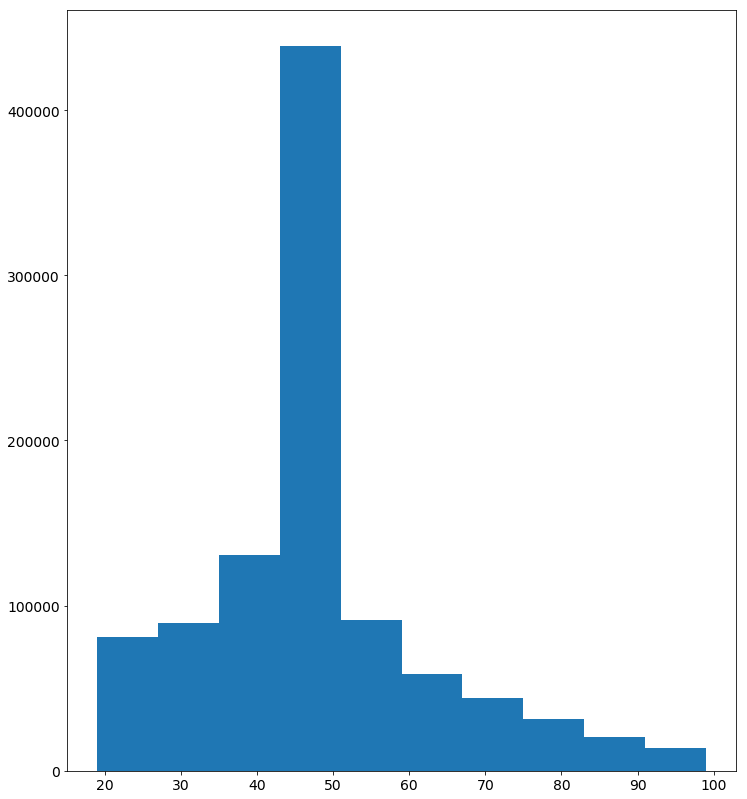

In [36]:
plt.hist(ds_practical_data_feature_transformed['age'])
plt.show()

## Finalizing predictors for model
### Selecting all features that good with respect to VIF, Correlation with target and distributions

In [37]:
ds_practical_data_feature_selected = ds_practical_data_feature_transformed[["target","age", "gender","presence_of_child_ind","number_of_news_subs","marital_status_M","streaming_media_subs","marital_status_S"]]
ds_practical_data_feature_selected.head(3)

,target,age,gender,presence_of_child_ind,number_of_news_subs,marital_status_M,streaming_media_subs,marital_status_S
0,0,43.0,0,0,0,1,0,0
1,0,90.0,1,0,0,0,0,0
2,1,46.0,0,0,0,0,1,1


In [38]:
X = ds_practical_data_feature_selected.loc[:, ds_practical_data_feature_selected.columns != 'target']
y = ds_practical_data_feature_selected.loc[:, ds_practical_data_feature_selected.columns == 'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [39]:
X_train.shape

(699650, 7)

In [40]:
X_test.shape    

(299850, 7)

In [41]:
y_train.shape 

(699650, 1)

In [42]:
y_test.shape

(299850, 1)

## Step-6: Model Selection and Building

### Strategy: 

* A very simple and non-sophisticated model like logistic regression would enable explainability of the model and important features
* The intent is to start with a logistic regression; If logistic regression is not a good a predictor, we could move to more sophisticated classification algorithms


In [43]:
logit_model=sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.168785
         Iterations: 35


C:\Users\Praveen\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.600      
Dependent Variable:       target               AIC:                  337414.7244
Date:                     2021-09-22 21:02     BIC:                  337497.4294
No. Observations:         999500               Log-Likelihood:       -1.6870e+05
Df Model:                 6                    LL-Null:              -4.2205e+05
Df Residuals:             999493               LLR p-value:          0.0000     
Converged:                0.0000               Scale:                1.0000     
No. Iterations:           35.0000                                               
--------------------------------------------------------------------------------
                       Coef.   Std.Err.      z     P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------
age                   -0.0655     0.0002 -346.7229 0.0000    

* Removing 'number_of_news_subs' from the regression due to a very high P-value; 0.05 and less values are considered to be good enough

In [44]:
X=X.drop('number_of_news_subs', axis=1)

* Updating the logistic regression after removal of unnecessary variable(s)

In [45]:
logit_model=sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.217592
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.485      
Dependent Variable:    target            AIC:               434978.3348
Date:                  2021-09-22 21:03  BIC:               435049.2249
No. Observations:      999500            Log-Likelihood:    -2.1748e+05
Df Model:              5                 LL-Null:           -4.2205e+05
Df Residuals:          999494            LLR p-value:       0.0000     
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        8.0000                                          
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
age                   -0.0652   0.0002 -381.3721 0.0000 -0.0656

* Fitting a logistic regression based on 'balanced' class_weight due to an imbalance in the data set with respect to classes in target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train, y_train)            

C:\Users\Praveen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Step-7: Model Evaluation

### Strategy: 
* Checking for Confusion matrix to see overall accuracy, recall and precision values

### Checking Overall accuracy and Confusion matrix

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [48]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[224662  30133]
 [  7554  37501]]


In [49]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92    254795
          1       0.55      0.83      0.67     45055

avg / total       0.91      0.87      0.88    299850



### Checking ROC curve

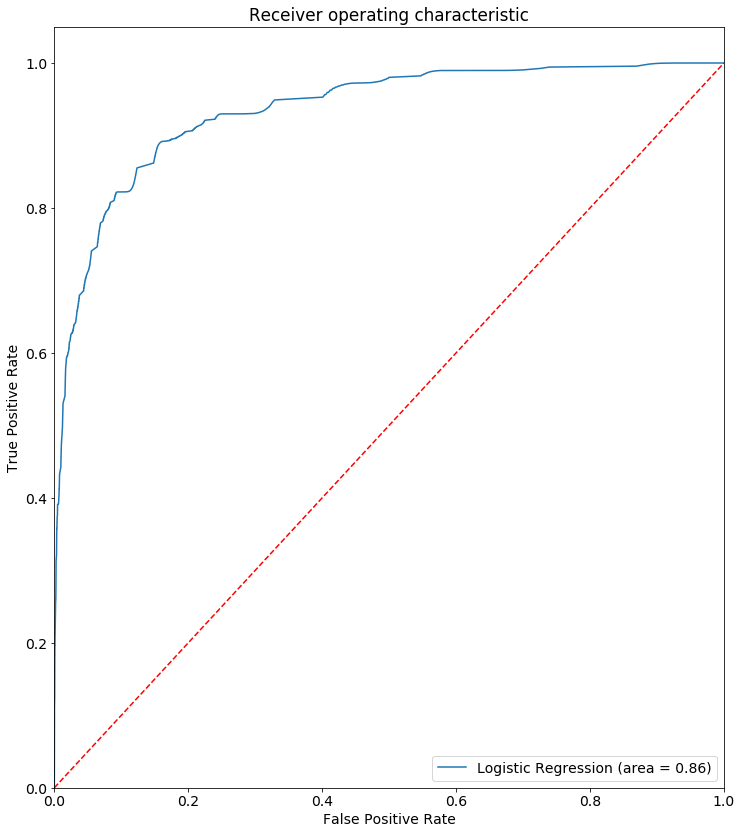

In [50]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Cross Validation
* Cross validation to make sure that the model is robust and works well for different data combinations

In [51]:
X_train.head(5)

,age,gender,presence_of_child_ind,marital_status_M,streaming_media_subs,marital_status_S
164104,76.0,0,0,0,0,0
576617,41.0,0,0,0,0,0
151571,50.0,0,0,0,0,0
457548,31.0,1,1,1,1,0
392891,32.0,0,0,0,0,0


In [52]:
y_train.head(3)

,target
164104,0
576617,0
151571,0


In [53]:
scores = cross_val_score(logreg,X_train,y_train.values.ravel(),cv=5)
scores

array([ 0.87480973,  0.87630244,  0.87513757,  0.87641678,  0.87597996])

## Observations:
* Model observed has an accuracy score of 87%; However, Recall and Precision rates can be tuned based on thresholds for target prediction

## Strategy:
* Goal of the exercise is to find best customers suitable for podcasts. Therefore, it's best to try and achieve a high Recall score
* By tuning thresholds, we can achieve either i. High Recall or ii. High Precision or iii. Optimized Recall and Precision

## Case-1: Tuning threshold to focus on high Recall

In [54]:
y_pred_modified_threshold_v1=(logreg.predict_proba(X_test)[:,1] >=0.49).astype(bool)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_modified_threshold_v1))
print("Recall:",metrics.recall_score(y_test,y_pred_modified_threshold_v1))
print("Precision:",metrics.precision_score(y_test,y_pred_modified_threshold_v1))

Accuracy: 0.873586793397
Recall: 0.844878481856
Precision: 0.551825113798


In [56]:
confusion_matrix = confusion_matrix(y_test, y_pred_modified_threshold_v1)
print(confusion_matrix)

[[223879  30916]
 [  6989  38066]]


In [57]:
print(classification_report(y_test, y_pred_modified_threshold_v1))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92    254795
          1       0.55      0.84      0.67     45055

avg / total       0.91      0.87      0.88    299850



## Case-2: Tuning threshold to focus on optimal Recall and Precision

In [58]:
y_pred_modified_threshold_v2=(logreg.predict_proba(X_test)[:,1] >=0.75).astype(bool)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_modified_threshold_v2))
print("Recall:",metrics.recall_score(y_test,y_pred_modified_threshold_v2))
print("Precision:",metrics.precision_score(y_test,y_pred_modified_threshold_v2))

Accuracy: 0.914647323662
Recall: 0.710132060815
Precision: 0.718536651096


In [60]:
confusion_matrix = confusion_matrix(y_test, y_pred_modified_threshold_v2)
print(confusion_matrix)

[[242262  12533]
 [ 13060  31995]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_modified_threshold_v2))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95    254795
          1       0.72      0.71      0.71     45055

avg / total       0.91      0.91      0.91    299850



## Case-3: Tuning threshold to focus on high Precision

In [62]:
y_pred_modified_threshold_v3=(logreg.predict_proba(X_test)[:,1] >=0.85).astype(bool)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_modified_threshold_v3))
print("Recall:",metrics.recall_score(y_test,y_pred_modified_threshold_v3))
print("Precision:",metrics.precision_score(y_test,y_pred_modified_threshold_v3))

Accuracy: 0.922694680674
Recall: 0.625546554212
Precision: 0.817093323283


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_modified_threshold_v3)
print(confusion_matrix)

[[248486   6309]
 [ 16871  28184]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_modified_threshold_v3))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96    254795
          1       0.82      0.63      0.71     45055

avg / total       0.92      0.92      0.92    299850



##  Strategy - Threshold Selection

* In order to prioritize the objective of identifying the best customers, Recall rate is prioritized and therefore, thereshold used in Case-1 is considered for scoring the population

## Creating Scoring Data

In [66]:
y_pred_with_finalized_threshold = (logreg.predict_proba(X)[:,1] >=0.49)
y_pred_finalized = y_pred_with_finalized_threshold.astype(int)
y_prob_finalized = logreg.predict_proba(X)[:,1]

In [67]:
X.shape

(999500, 6)

In [68]:
y_pred_with_finalized_threshold.shape

(999500,)

In [69]:
y_pred_finalized.shape

(999500,)

In [70]:
y_prob_finalized.shape

(999500,)

In [71]:
Scores = pd.DataFrame()
# anon_person_id | target | prediction | probability |
Scores['anon_person_id']=ds_practical_data_feature_transformed['anon_person_id']
Scores['target']=ds_practical_data_feature_transformed['target']
Scores['prediction']=y_pred_finalized
Scores['probability']=y_prob_finalized

In [72]:
Scores.head(5)

,anon_person_id,target,prediction,probability
0,1,0,0,0.486447
1,2,0,0,0.013850
2,3,1,1,0.982533
3,4,0,1,0.824294
4,5,0,0,0.132053


In [73]:
print(Scores['prediction'].value_counts(ascending=True, normalize=True, dropna=False)*100)

1    22.876238
0    77.123762
Name: prediction, dtype: float64


In [74]:
print(Scores['target'].value_counts(ascending=True, normalize=True, dropna=False)*100)

1    14.974087
0    85.025913
Name: target, dtype: float64


In [75]:
Scores.to_csv (r'Scores.csv', index = False, header=True)

## Using probability deciles to arrive at best populations to target
* Top deciles are desinged to have the best conversion rates; Therefore, the top most deciles should be prioritized for audience selection

In [101]:
y_prob_class_zero = logreg.predict_proba(X)[:,0]
Scores_target_audience = pd.DataFrame()
Scores_target_audience['decile']=pd.qcut(y_prob_class_zero,10,labels=False)
Scores_target_audience['max_prob']=Scores['probability']
Scores_target_audience['min_prob']=Scores['probability']
Scores_target_audience['target']=Scores['target']
Scores_target_audience['pop_size']=Scores['probability']
Scores_target_audience_grouped = Scores_target_audience.groupby('decile').agg({'max_prob':'max','min_prob':'min','target':'sum','pop_size':'count'})
Scores_target_audience_grouped

,max_prob,min_prob,target,pop_size
decile,,,,
0,0.999320,0.917956,86132,100242
1,0.917856,0.607704,36621,99908
2,0.607388,0.334760,12640,99821
3,0.334756,0.181295,4133,101088
4,0.180771,0.154104,5144,100995
5,0.153643,0.114411,2297,109847
6,0.114247,0.035412,1191,88693
7,0.034902,0.026859,833,186459
8,0.026470,0.025334,407,16112


## Verifying trends with predicted & target for major variables

In [110]:
ds_practical_data_feature_selected.head(2)

,target,age,gender,presence_of_child_ind,number_of_news_subs,marital_status_M,streaming_media_subs,marital_status_S
0,0,43.0,0,0,0,1,0,0
1,0,90.0,1,0,0,0,0,0


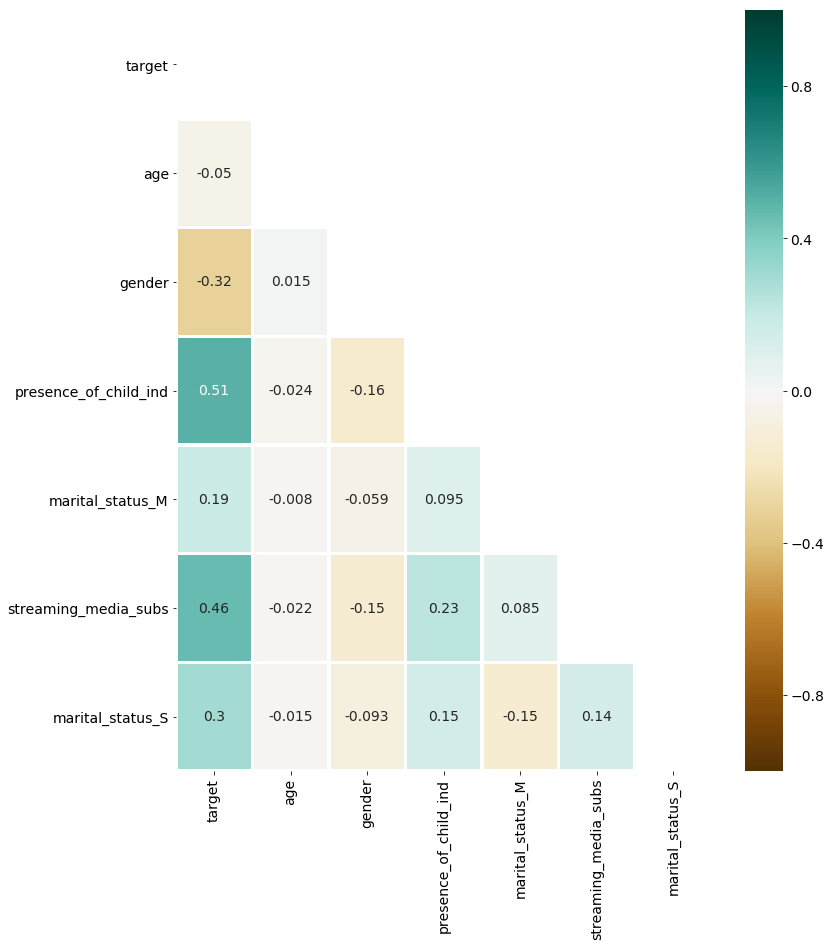

In [111]:
corr_df=ds_practical_data_feature_selected[ds_practical_data_feature_selected.columns.drop('number_of_news_subs')].corr(method='pearson')
# Creating a mask to display only the lower triangle of the matrix
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='BrBG',vmax=1.0,vmin=-1.0,mask=mask, linewidths=2.5,annot=True)
# Reorienting the labels to better represent the chart
plt.rcParams['figure.figsize'] = [12, 14]
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [102]:
ds_practical_data_feature_transformed['prediction'] = (logreg.predict_proba(X)[:,1] >=0.49)

In [103]:
print(pd.crosstab(ds_practical_data_feature_transformed.marital_status_S, ds_practical_data_feature_transformed.prediction, normalize='index'))
print('-------------------------------------')
print(pd.crosstab(ds_practical_data_feature_transformed.marital_status_S, ds_practical_data_feature_transformed.target, normalize='index'))

prediction           False     True 
marital_status_S                    
0                 0.799420  0.200580
1                 0.229934  0.770066
-------------------------------------
target                   0         1
marital_status_S                    
0                 0.874440  0.125560
1                 0.385811  0.614189


In [104]:
print(pd.crosstab(ds_practical_data_feature_transformed.marital_status_M, ds_practical_data_feature_transformed.prediction, normalize='index'))
print('-------------------------------------')
print(pd.crosstab(ds_practical_data_feature_transformed.marital_status_M, ds_practical_data_feature_transformed.target, normalize='index'))

prediction           False     True 
marital_status_M                    
0                 0.844726  0.155274
1                 0.591832  0.408168
-------------------------------------
target                   0         1
marital_status_M                    
0                 0.893001  0.106999
1                 0.745913  0.254087


In [105]:
print(pd.crosstab(ds_practical_data_feature_transformed.presence_of_child_ind, ds_practical_data_feature_transformed.prediction, normalize='index'))
print('-------------------------------------')
print(pd.crosstab(ds_practical_data_feature_transformed.presence_of_child_ind, ds_practical_data_feature_transformed.target, normalize='index'))

prediction                False     True 
presence_of_child_ind                    
0                      0.870414  0.129586
1                      0.184971  0.815029
-------------------------------------
target                        0         1
presence_of_child_ind                    
0                      0.924525  0.075475
1                      0.411245  0.588755


In [106]:
print(pd.crosstab(ds_practical_data_feature_transformed.gender, ds_practical_data_feature_transformed.prediction, normalize='index'))
print('-------------------------------------')
print(pd.crosstab(ds_practical_data_feature_transformed.gender, ds_practical_data_feature_transformed.target, normalize='index'))

prediction     False     True 
gender                        
0           0.573408  0.426592
1           0.917690  0.082310
-------------------------------------
target         0         1
gender                    
0       0.719017  0.280983
1       0.947417  0.052583


In [107]:
print(pd.crosstab(ds_practical_data_feature_transformed.streaming_media_subs, ds_practical_data_feature_transformed.prediction, normalize='index'))
print('-------------------------------------')
print(pd.crosstab(ds_practical_data_feature_transformed.streaming_media_subs, ds_practical_data_feature_transformed.target, normalize='index'))

prediction               False     True 
streaming_media_subs                    
0                     0.885262  0.114738
1                     0.228802  0.771198
-------------------------------------
target                       0         1
streaming_media_subs                    
0                     0.925755  0.074245
1                     0.491109  0.508891


## Creating pickle files

In [108]:
import pickle
model_name = 'ds_pa_logreg.pkl'
pickle.dump(logreg, open(model_name,'wb'))